# **Denoising a signal**
There are various techniques for denoising a signal, and the ones you have mentioned are commonly used. Here's a brief explanation of each technique:

**Fast Fourier Transform (FFT):** FFT is a mathematical algorithm that can convert a signal from the time domain to the frequency domain. By analyzing the signal's frequency components, we can identify and remove unwanted noise.

**Filtering:** This technique involves using digital filters to remove unwanted noise from a signal. There are several types of digital filters, including high-pass filters, low-pass filters, bandpass filters, and band-stop filters. Each filter type removes a specific range of frequencies from the signal.

**Visualization:** Visualizing a signal before and after denoising can help identify noise in the signal. This technique is useful for identifying noise patterns that may not be immediately apparent in the raw signal.

**Power thresholding:** This technique involves setting a threshold for the power level of the signal. Any frequencies with power levels below the threshold are considered noise and are removed from the signal.

**ObsPy-based filtering:** ObsPy is an open-source Python toolbox for processing seismological data. The toolbox includes several filtering methods, including low-pass, high-pass, bandpass, and band-stop filters.

Overall, the choice of denoising technique depends on the nature of the signal and the type of noise present in the signal.

# Create synthetic signal

In [1]:
import numpy as np

# Create synthetic signal
dt = 0.001
t = np.arange(0, 1, dt)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t) # Sum of 2 Sequencies
signal_clean = signal
signal = signal + 2.5 * np.random.randn(len(t)) # Add some noise
min_signal, max_signal = signal.min(), signal.max()

Here's a line-by-line explanation of the code:

`dt = 0.001`: The variable dt is set to 0.001, which represents the time interval between samples in the signal.

`t = np.arange(0, 1, dt)`: The variable t is set to an array of values from 0 to 1 with a step size of dt. This creates a time axis for the signal.

`signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)`: Two sine waves with frequencies of 50 Hz and 120 Hz are created and added together to form a synthetic signal.

`signal_clean = signal`: A copy of the original signal is created and assigned to the variable signal_clean.

`signal = signal + 2.5 * np.random.randn(len(t))`: Gaussian noise with mean 0 and standard deviation 2.5 is added to the original signal signal. The length of the noise signal matches the length of the time axis t.

`min_signal, max_signal = signal.min(), signal.max()`: The minimum and maximum values of the noisy signal are computed and assigned to the variables min_signal and max_signal, respectively. These values are used for visualization purposes later on.

# Graphical representation of the created synthetic signal

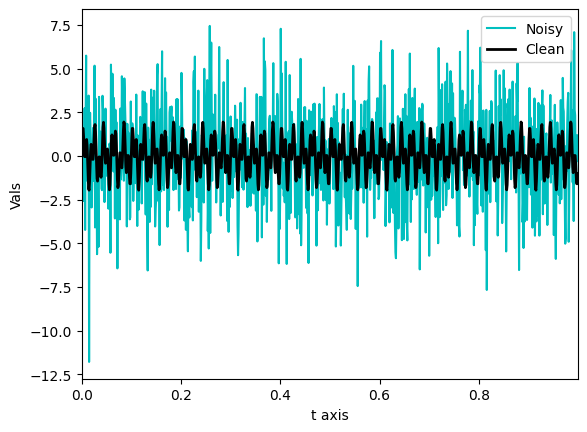

In [2]:
import matplotlib.pyplot as plt
plt.plot(t, signal, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, signal_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

Here's a line-by-line explanation of the code:

`import matplotlib.pyplot as plt`: The matplotlib library is imported as plt for plotting.

`plt.plot(t, signal, color='c', linewidth=1.5, label='Noisy')`: A plot is created with time t on the x-axis and the noisy signal signal on the y-axis. The color is set to cyan ('c'), the line width is set to 1.5, and the label is set to 'Noisy'.

`plt.plot(t, signal_clean, color='k', linewidth=2, label='Clean')`: Another plot is created with time t on the x-axis and the clean signal signal_clean on the y-axis. The color is set to black ('k'), the line width is set to 2, and the label is set to 'Clean'.

`plt.xlim(t[0], t[-1])`: The limits of the x-axis are set to the first and last values of t.

`plt.xlabel('t axis')`: The x-axis label is set to 't axis'.

`plt.ylabel('Vals')`: The y-axis label is set to 'Vals'.

`plt.legend()`: A legend is added to the plot to identify the two signal lines, based on their labels.

# Perform Fast Fourier Transform

In [3]:
# Compute the Fast Fourier Transform (FFT)
n = len(t)
fhat = np.fft.fft(signal, n)                 # Compute the FFT
psd = fhat * np.conj(fhat) / n          
freq = (1 / (dt * n)) * np.arange(n)    # frequency array
idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)  # first half index

Here's a line-by-line explanation of the code:

`n = len(t)`: The length of the time axis t is assigned to the variable n.

`fhat = np.fft.fft(signal, n)`: The Fast Fourier Transform (FFT) of the noisy signal signal is computed using np.fft.fft(). The length of the FFT is set to n, which is the same as the length of the time axis.

`psd = fhat * np.conj(fhat) / n`: The power spectral density (PSD) is computed by taking the square magnitude of the FFT fhat and dividing by n. The np.conj() function is used to take the complex conjugate of fhat.

`freq = (1 / (dt * n)) * np.arange(n)`: The frequency array freq is created using the formula `freq = (1 / (dt * n)) * np.arange(n)`, where dt is the time step and n is the length of the signal. This creates an array of frequencies in Hz.

`idxs_half = np.arange(1, np.floor(n / 2), dtype=np.int32)`: An array of integers is created from 1 to n/2 (exclusive) using `np.arange()`. The dtype argument is set to `np.int32` to ensure that the indices are integer values. This array is used later for plotting purposes to only show the first half of the PSD.

# Power Spectrum Density of the Noise Signal

/Users/panya/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/panya/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


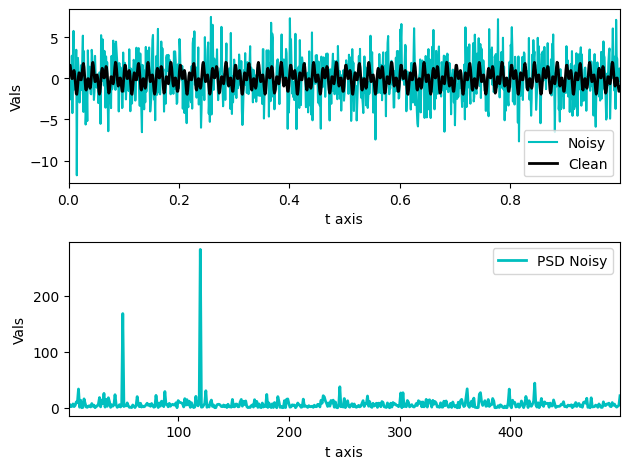

In [4]:
fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, signal, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, signal_clean, color='k', linewidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[idxs_half], psd[idxs_half], color='c', linewidth=2, label='PSD Noisy')
plt.xlim(freq[idxs_half[0]], freq[idxs_half[-1]])
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

Here's a line-by-line explanation of the code:

`fig, axs = plt.subplots(2, 1)`: A figure object and an array of two Axes objects are created using plt.subplots(). The 2 and 1 arguments indicate that there will be two subplots stacked vertically.

`plt.sca(axs[0])`: The current Axes object is set to the first subplot using plt.sca().

`plt.plot(t, signal, color='c', linewidth=1.5, label='Noisy')`: A plot of the noisy signal is created using `plt.plot()`. The color is set to cyan ('c'), the line width is set to 1.5, and the label is set to 'Noisy'.

`plt.plot(t, signal_clean, color='k', linewidth=2, label='Clean')`: A plot of the clean signal is created using plt.plot(). The color is set to black ('k'), the line width is set to 2, and the label is set to 'Clean'.

`plt.xlim(t[0], t[-1])`: The limits of the x-axis are set to the first and last values of t.

`plt.xlabel('t axis')`: The x-axis label is set to 't axis'.

`plt.ylabel('Vals')`: The y-axis label is set to 'Vals'.

`plt.legend()`: A legend is added to the plot to identify the two signal lines, based on their labels.

`plt.sca(axs[1])`: The current Axes object is set to the second subplot using plt.sca().

`plt.plot(freq[idxs_half], psd[idxs_half], color='c', linewidth=2, label='PSD Noisy')`: A plot of the PSD of the noisy signal is created using `plt.plot()`. Only the first half of the PSD is shown using freq[idxs_half] and psd[idxs_half]. The color is set to cyan ('c'), the line width is set to 2, and the label is set to 'PSD Noisy'.

`plt.xlim(freq[idxs_half[0]], freq[idxs_half[-1]])`: The limits of the x-axis are set to the first and last values of freq that correspond to the first half of the PSD.

`plt.xlabel('t axis')`: The x-axis label is set to 't axis'.

`plt.ylabel('Vals')`: The y-axis label is set to 'Vals'.

`plt.legend()`: A legend is added to the plot to identify the PSD line, based on its label.

`plt.tight_layout()`: Adjust the spacing between the subplots to prevent overlapping.

# Filter out the noise

In [5]:
threshold = 100
psd_idxs = psd > threshold # array of 0 and 1
psd_clean = psd * psd_idxs # zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat # used to retreive the signal

signal_filtered = np.fft.ifft(fhat_clean) # inverse fourier transform

Here's a line-by-line explanation of the code:

`threshold = 100`: A threshold value of 100 is set to determine which frequency components of the signal should be considered as noise.

`psd_idxs = psd > threshold`: A boolean array is created by comparing each element of psd to the threshold value. The resulting array contains True where psd is greater than the threshold, and False otherwise.

`psd_clean = psd * psd_idxs`: The elements of psd that correspond to frequencies below the threshold are zeroed out by element-wise multiplication with psd_idxs.

`fhat_clean = psd_idxs * fhat`: The same boolean array psd_idxs is used to zero out the frequency components of the FFT of the noisy signal, fhat, that correspond to frequencies below the threshold. The resulting array fhat_clean retains only the frequency components that correspond to the signal.

`signal_filtered = np.fft.ifft(fhat_clean)`: The inverse FFT is applied to fhat_clean using np.fft.ifft() to retrieve the time-domain filtered signal. The resulting signal_filtered is the filtered version of the noisy signal.

# Graphical representation of noisy signal and filtered signal

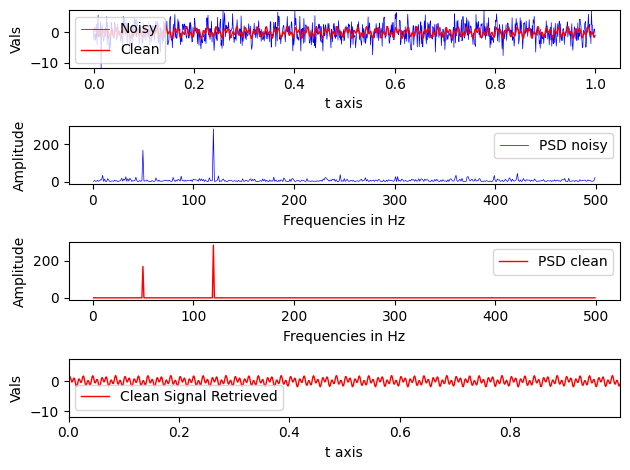

In [6]:
# plt.rcParams['figure.figsize'] = [8,10]
fig, axs = plt.subplots(4, 1)

plt.sca(axs[0])
plt.plot(t, signal, color='b', linewidth=0.5, label='Noisy')
plt.plot(t, signal_clean, color='r', linewidth=1, label='Clean')
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', linewidth=0.5, label='PSD noisy')
plt.xlabel('Frequencies in Hz')
plt.ylabel('Amplitude')
plt.legend()

plt.sca(axs[2])
plt.plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', linewidth=1, label='PSD clean')
plt.xlabel('Frequencies in Hz')
plt.ylabel('Amplitude')
plt.legend()

plt.sca(axs[3])
plt.plot(t, signal_filtered, color='r', linewidth=1, label='Clean Signal Retrieved')
plt.xlim(t[0], t[-1])
plt.ylim(min_signal, max_signal)
plt.xlabel('t axis')
plt.ylabel('Vals')
plt.legend()

plt.tight_layout()

Here's a line-by-line explanation of the code:

`fig, axs = plt.subplots(4, 1)`: A 4x1 grid of subplots is created using plt.subplots(), and the resulting figure and axes are assigned to fig and axs, respectively.

`plt.sca(axs[0])`: The first subplot is selected using plt.sca(), which sets the current axes to the first subplot.

`plt.plot(t, signal, color='b', linewidth=0.5, label='Noisy')`: The noisy signal is plotted in blue using plt.plot(), with a line width of 0.5 and a label of "Noisy".

`plt.plot(t, signal_clean, color='r', linewidth=1, label='Clean')`: The clean signal is plotted in red using plt.plot(), with a line width of 1 and a label of "Clean".

`plt.ylim(min_signal, max_signal)`: The y-axis limits of the plot are set to the minimum and maximum values of the noisy signal using plt.ylim().

`plt.xlabel('t axis')`: The x-axis label is set to "t axis" using plt.xlabel().

`plt.ylabel('Vals')`: The y-axis label is set to "Vals" using plt.ylabel().

`plt.legend()`: A legend is added to the plot using plt.legend().

Steps 2-8 are repeated for the remaining three subplots, with the second subplot showing the PSD of the noisy signal, the third subplot showing the PSD of the filtered signal, and the fourth subplot showing the filtered signal itself.

`plt.tight_layout()`: The layout of the subplots is adjusted using plt.tight_layout(), which reduces the spacing between the subplots to improve readability.